In [16]:
# Chapter1
# NN構築試行
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score  # モデルの評価を行うための関数
from keras import metrics
# 学習データ読み込み
data_X = pd.read_csv("train.csv")
data = data_X.dropna(how="any")

pd.set_option("max_columns", 100)
# pd.set_option('max_rows', 100)
# data_X.fillna(data_X.mean)
# data = data_X
data.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0
5,5,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",1.0,Real Bed,1.0,1.0,flexible,NYC,t,I have other listings in the same apartment: h...,2017-02-10,t,t,100%,2016-11-29,f,2017-09-15,40.640241,-74.015729,"Close NYU Langone H, Room A/3min to Subway",Sunset Park,7,House,94.0,Private room,https://a0.muscache.com/im/pictures/dd071463-3...,11220,55.0
6,6,2,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",1.5,Real Bed,1.0,1.0,moderate,NYC,t,"Stay in a Cozy, Private bedroom in newly renov...",2015-05-15,t,t,100%,2014-05-29,t,2017-09-05,40.676824,-73.915965,Cozy Artist Bedroom less than 30 min to Manhattan,Bedford-Stuyvesant,65,House,91.0,Private room,https://a0.muscache.com/im/pictures/79595629/9...,11233,48.0
8,8,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",1.0,Real Bed,1.0,1.0,strict,SF,t,Very bright & cozy private room right in the h...,2017-06-06,t,f,100%,2016-07-09,f,2017-09-16,37.801514,-122.411410,PERFECT Location in North Beach,North Beach,21,Apartment,87.0,Private room,https://a0.muscache.com/im/pictures/b1e47fdc-1...,94133,95.0


In [17]:
# # Chapter2
# 学習の再現を行うために乱数シードを固定するためのコード
import os
import random as rn
from tensorflow.compat.v1.keras import backend as K

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
rn.seed(0)

tf.compat.v1.set_random_seed(0)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph())
K.set_session(sess)

In [18]:
# Chapter3
# データ前処理
def pre_process(input_data_X: pd.DataFrame):
    city = input_data_X["city"]
    temp_data = input_data_X.drop(["id","amenities",  "description", "first_review", "host_response_rate", "host_since", "last_review", "name", "neighbourhood", "thumbnail_url", "zipcode", "city", "room_type", "property_type"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
    temp_data = pd.get_dummies(temp_data)
    temp_data = temp_data.drop(["property_type_Earth House","property_type_Lighthouse","property_type_Tipi","property_type_Train","property_type_Treehouse","property_type_Vacation home"], axis=1, errors="ignore")
    temp_data = ((temp_data - temp_data.min()) / (temp_data.max() - temp_data.min()))
    processed_X = processed_X
    # processed_X = temp_data.assign(city=city)

    # (x - train_stats['mean']) / train_stats['std']
    return processed_X
# train_dataset = data.sample(frac=0.8,random_state=0)
# test_dataset = data.drop(train_dataset.index)
train_dataset = data
test_dataset = data

train_y = train_dataset["y"]
test_y = test_dataset["y"]
train_X = pre_process(train_dataset.drop(["y"], axis=1))
test_X = pre_process(test_dataset.drop(["y"], axis=1))


NameError: name 'processed_X' is not defined

In [4]:
# train_stats = train_dataset.describe()
# train_stats.pop("y")
# train_stats = train_stats.transpose()

# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_X)
# normed_test_data = norm(test_X)

In [5]:
test_X.dtypes

accommodates                           float64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
cleaning_fee                           float64
host_has_profile_pic                   float64
host_identity_verified                 float64
instant_bookable                       float64
latitude                               float64
longitude                              float64
number_of_reviews                      float64
review_scores_rating                   float64
bed_type_Airbed                        float64
bed_type_Couch                         float64
bed_type_Futon                         float64
bed_type_Pull-out Sofa                 float64
bed_type_Real Bed                      float64
cancellation_policy_flexible           float64
cancellation_policy_moderate           float64
cancellation_policy_strict             float64
cancellation_policy_super_strict_30    float64
cancellation_

In [6]:
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.metrics import binary_accuracy, Accuracy
from tensorflow.keras.layers import SimpleRNN
import optuna


In [7]:
# hoge = train_dataset.drop(["id","amenities", "bed_type", "cancellation_policy", "city", "description", "first_review", "host_response_rate", "host_since"
#                                 , "last_review", "name", "neighbourhood", "property_type", "room_type", "thumbnail_url", "zipcode"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
# sns.pairplot(hoge[["y", "accommodates","host_identity_verified","instant_bookable", "number_of_reviews", "review_scores_rating"]], diag_kind="kde")

In [8]:
from tensorflow import feature_column
ccwvl_city = feature_column.categorical_column_with_vocabulary_list('city', ['LA', 'DC', 'NYC', 'SF', 'Chicago', 'Boston'])
ic_city = feature_column.indicator_column(ccwvl_city)

In [9]:
feature_layer = tf.keras.layers.DenseFeatures([ic_city])

In [14]:
keras.backend.clear_session()
# Keras以外を利用するのも一つの手段。
model = keras.models.Sequential()
model.add(feature_layer)
model.add(Dense(units=256, activation=tf.nn.relu, input_shape=[len(train_X.keys())])) 
# model.add(Dropout(0.5))
model.add(keras.layers.BatchNormalization())  # バッチ正規化層
model.add(Dense(units=256, activation=tf.nn.relu)) 
# model.add(Dropout(0.5))
model.add(keras.layers.BatchNormalization())  # バッチ正規化層
model.add(Dense(units=1))
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
        loss=keras.losses.mse,
        metrics=["mae", "mse"])

In [15]:
history = model.fit(x = train_X,
    y = train_y,
    batch_size = 8192, # バッチサイズ
    # epochs = 100, # エポック数
    epochs = 700, # エポック数
    validation_split = 0.1, # 検証データの割合
    # callbacks = [es_cb], # 早期終了の設定
    verbose = 1) # 進捗の確認を行うか（0:行わない, 1:行う）

Epoch 1/700


ValueError: in user code:

    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\N.N\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\feature_column\dense_features.py:160 call  **
        features)

    ValueError: ('We expected a dictionary here. Instead we got: ', <tf.Tensor 'sequential/Cast:0' shape=(None, 22) dtype=float32>)


In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,53696.394531,159.846344,53696.394531,55582.312500,162.372284,55582.312500,0
1,53646.339844,159.691605,53646.339844,55530.929688,162.213974,55530.929688,1
2,53592.542969,159.523270,53592.542969,55472.367188,162.033386,55472.367188,2
3,53531.285156,159.330856,53531.285156,55403.933594,161.822052,55403.933594,3
4,53459.636719,159.106003,53459.636719,55323.433594,161.573151,55323.433594,4


In [125]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
695,28145.013672,97.425209,28145.013672,29224.648438,99.372841,29224.648438,695
696,28145.105469,97.351555,28145.105469,29226.355469,99.258942,29226.355469,696
697,28144.935547,97.338058,28144.935547,29227.259766,99.203186,29227.259766,697
698,28145.056641,97.379639,28145.056641,29226.603516,99.243622,29226.603516,698
699,28144.855469,97.378922,28144.855469,29227.564453,99.185143,29227.564453,699


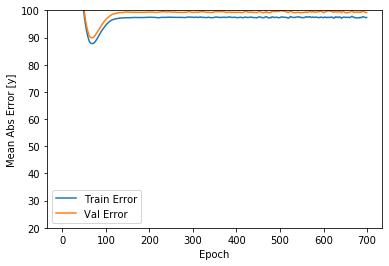

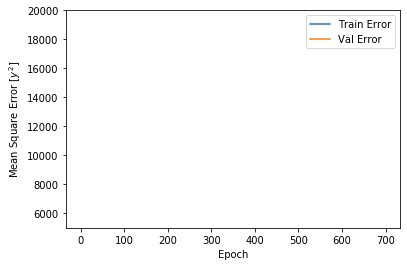

In [126]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [y]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([20,100])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$y^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([5000,20000])
  plt.legend()
  plt.show()


plot_history(history)

In [127]:
# 重回帰
# 説明変数の重みを確認
from sklearn import linear_model  # 線形回帰を行うためのモジュール
# 変数の準備
# X = data_oh.drop(["loan_status_ChargedOff", "loan_status_FullyPaid"], axis=1)  # 説明変数の設定
# y = data_oh["loan_status_FullyPaid"]  # 目的変数の設定

# 学習
lr = linear_model.LinearRegression()  # 線形回帰モデルのインスタンスを作成
lr.fit(train_X, train_y)  # 回帰の実行

# 結果の確認
print("回帰係数:")
print(pd.DataFrame({"Name": train_X.columns,
                    "Coefficients": lr.coef_}).sort_values(by='Coefficients'))  # 回帰係数
print("切片:", lr.intercept_)  # 切片
print("決定係数:", lr.score(train_X, train_y))  # 決定係数

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [98]:
test_X.dtypes

accommodates                           float64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
cleaning_fee                           float64
host_has_profile_pic                   float64
host_identity_verified                 float64
instant_bookable                       float64
latitude                               float64
longitude                              float64
number_of_reviews                      float64
review_scores_rating                   float64
bed_type_Airbed                        float64
bed_type_Couch                         float64
bed_type_Futon                         float64
bed_type_Pull-out Sofa                 float64
bed_type_Real Bed                      float64
cancellation_policy_flexible           float64
cancellation_policy_moderate           float64
cancellation_policy_strict             float64
cancellation_policy_super_strict_30    float64
cancellation_

In [99]:
pd.set_option('max_rows', 100)
train_X.dtypes

accommodates                           float64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
cleaning_fee                           float64
host_has_profile_pic                   float64
host_identity_verified                 float64
instant_bookable                       float64
latitude                               float64
longitude                              float64
number_of_reviews                      float64
review_scores_rating                   float64
bed_type_Airbed                        float64
bed_type_Couch                         float64
bed_type_Futon                         float64
bed_type_Pull-out Sofa                 float64
bed_type_Real Bed                      float64
cancellation_policy_flexible           float64
cancellation_policy_moderate           float64
cancellation_policy_strict             float64
cancellation_policy_super_strict_30    float64
cancellation_

In [100]:
data_X = pd.read_csv("test.csv")
test_X = pre_process(data_X)
y_proba = model.predict(test_X)
y_proba

array([[142.69255 ],
       [ 99.33536 ],
       [       nan],
       ...,
       [       nan],
       [129.52144 ],
       [ 62.685684]], dtype=float32)

In [101]:
np.savetxt("C:\work\AI\workspace\\10.2_民博サービスの宿泊価格予測\\result.dat", y_proba.astype("float"), fmt="%0.10f",)

In [102]:
hoge = y_proba.astype("float")

In [103]:
np.savetxt("C:\work\AI\workspace\\10.2_民博サービスの宿泊価格予測\\hoge.dat", hoge)

In [104]:
data.shape

(28892, 29)

In [105]:
data_X.shape

(18528, 28)